In [ ]:
%matplotlib inline

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


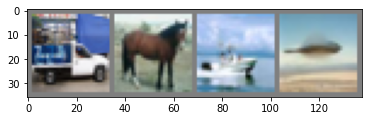

truck horse  ship plane


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# show the labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size) ))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class AlexNet_original(nn.Module):
  def __init__(self, num_classes: int = 1000, dropout: float = 0.5):
    super().__init__()

    self.features = nn.Sequential(
        
        # Convolution : 3 channels -> 64 channels
        nn.Conv2d(3, 64, kernel_size = 11, stride = 4, padding = 2),

        # ReLU activation : y = max(x, 0)
        nn.ReLU(inplace = True),

        # MaxPooling : 3x3 : 9 values => Pick largest
        nn.MaxPool2d(kernel_size = 3, stride = 2),

        # Convolution : 64 channels -> 192 channels
        nn.Conv2d(64, 192, kernel_size=5, padding = 2),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(kernel_size = 3, stride = 2),

        # Convolution : 192 channels -> 384 channels
        nn.Conv2d(192, 384, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),

        # Convolution : 384 channels -> 256 channels
        nn.Conv2d(384, 256, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),

        # Convolution : 256 channels -> 256 channels
        nn.Conv2d(256, 256, kernel_size = 3, padding = 1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size = 3, stride = 2),
    )

    self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
    self.classifier = nn.Sequential(
        # Dropout 0.5
        nn.Dropout(p = dropout),

        # fully connected layer
        nn.Linear(256 * 6 * 6, 4096),
        nn.ReLU(inplace = True),
        nn.Dropout(p=dropout),

        # fully connected layer
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        
        # fully connected layer
        nn.Linear(4096, num_classes),
    )

  def forward(self, x: torch.tensor):
    
    # Extract features from the images
    x = self.features(x)

    # Average pooling
    x = self.avgpool(x)

    # Flatten the image
    x = torch.flatten(x, 1)

    # Classification
    x = self.classifier(x)

    return x


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class AlexNet_CIFAR10(nn.Module):
  def __init__(self, num_classes: int = 10, dropout: float = 0.5):
    super().__init__()

    self.features = nn.Sequential(
        
        # Convolution : 3 channels -> 64 channels
        nn.Conv2d(3, 64, kernel_size = 3, stride = 4, padding = 2),

        # ReLU activation : y = max(x, 0)
        nn.ReLU(inplace = True),

        # MaxPooling : 3x3 : 9 values => Pick largest
        nn.MaxPool2d(kernel_size = 3, stride = 2),

        # Convolution : 64 channels -> 192 channels
        nn.Conv2d(64, 192, kernel_size=5, padding = 2),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(kernel_size = 3, stride = 2),

        # Convolution : 192 channels -> 384 channels
        nn.Conv2d(192, 384, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),

        # Convolution : 384 channels -> 256 channels
        nn.Conv2d(384, 256, kernel_size = 3, padding = 1),
        nn.ReLU(inplace = True),

        # Convolution : 256 channels -> 256 channels
        # nn.Conv2d(256, 256, kernel_size = 3, padding = 1),
        # nn.ReLU(inplace=True),
        # nn.MaxPool2d(kernel_size = 3, stride = 2),
    )

    # self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
    self.classifier = nn.Sequential(
        # Dropout 0.5
        nn.Dropout(p = dropout),

        # fully connected layer
        # nn.Linear(256 * 6 * 6, 4096),
        # nn.ReLU(inplace = True),
        # nn.Dropout(p=dropout),

        # fully connected layer
        nn.Linear(256, 256),
        nn.ReLU(inplace=True),
        
        # fully connected layer
        nn.Linear(256, num_classes),
    )

  def forward(self, x: torch.tensor):
    
    # Extract features from the images
    x = self.features(x)

    # Average pooling
    # x = self.avgpool(x)

    # Flatten the image
    x = torch.flatten(x, 1)

    # Classification
    x = self.classifier(x)

    return x


In [ ]:
import torch.optim as optim

net = AlexNet_CIFAR10()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 1e-3, momentum = 0.9)

In [ ]:
# Training the network

numEpochs = 10
for epoch in range(numEpochs):

  running_loss = 0.0

  for i, data in enumerate(trainloader, 0):

    # get the inputs and labels; 
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward propagation
    outputs = net(inputs)

    # compute the loss
    loss = criterion(outputs, labels)

    # backpropagation
    loss.backward()

    # update the parameters
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 200 == 199:
      print('[%d, %5d] loss: %.3f' % 
            (epoch +1, i + 1, running_loss / 200))
      running_loss = 0

print('Finished the Training')


[1,   200] loss: 23.030
[1,   400] loss: 23.031
[1,   600] loss: 23.035
[1,   800] loss: 23.024
[1,  1000] loss: 23.017
[1,  1200] loss: 23.048
[1,  1400] loss: 23.025
[1,  1600] loss: 23.024
[1,  1800] loss: 23.026
[1,  2000] loss: 23.020
[1,  2200] loss: 23.021
[1,  2400] loss: 23.004
[1,  2600] loss: 23.020
[1,  2800] loss: 23.007
[1,  3000] loss: 23.030
[1,  3200] loss: 23.009
[1,  3400] loss: 22.998
[1,  3600] loss: 22.972
[1,  3800] loss: 22.997
[1,  4000] loss: 22.963
[1,  4200] loss: 22.954
[1,  4400] loss: 22.892
[1,  4600] loss: 22.821
[1,  4800] loss: 22.852
[1,  5000] loss: 22.662
[1,  5200] loss: 22.452
[1,  5400] loss: 22.289
[1,  5600] loss: 22.066
[1,  5800] loss: 21.617
[1,  6000] loss: 21.402
[1,  6200] loss: 21.028
[1,  6400] loss: 20.627
[1,  6600] loss: 21.155
[1,  6800] loss: 20.741
[1,  7000] loss: 20.729
[1,  7200] loss: 20.485
[1,  7400] loss: 20.040
[1,  7600] loss: 20.213
[1,  7800] loss: 20.046
[1,  8000] loss: 19.982
[1,  8200] loss: 19.910
[1,  8400] loss:

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network 
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))